In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt

In [2]:
df=pd.read_csv('data\song_data.csv')
df.head()
df.shape

(18835, 15)

In [6]:
popularity_percentile = 80
pop_crit = np.percentile(df['song_popularity'],popularity_percentile)

df1=df

def trans(x):
    if x>pop_crit:
        return 1
    else:
        return 0

df1['song_popularity']=df1['song_popularity'].apply(trans)
df1.tail()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
18830,Let It Breathe,0,159645,0.893,0.500,0.151,0.000065,11,0.111,-16.107,1,0.0348,113.969,4,0.300
18831,Answers,0,205666,0.765,0.495,0.161,0.000001,11,0.105,-14.078,0,0.0301,94.286,4,0.265
18832,Sudden Love (Acoustic),0,182211,0.847,0.719,0.325,0.000000,0,0.125,-12.222,1,0.0355,130.534,4,0.286
18833,Gentle on My Mind,0,352280,0.945,0.488,0.326,0.015700,3,0.119,-12.020,1,0.0328,106.063,4,0.323
18834,Up to Me,0,193533,0.911,0.640,0.381,0.000254,4,0.104,-11.790,1,0.0302,91.490,4,0.581


In [7]:
X=df1[df1.columns[2:]].values #song_popularity
y=df1[df1.columns[1]].values #other features

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    shuffle=True,random_state=123, stratify=y)

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

glm=LogisticRegression()
glm.fit(X_train,y_train)
glm.score(X_test,y_test)
conf=confusion_matrix(y_test, glm.predict(X_test))
glm.coef_

array([[-2.97835894e-06, -7.24510172e-05, -7.02834902e-06,
        -1.47259674e-05, -6.12544930e-05, -3.48387376e-04,
        -1.41111286e-05,  1.41717696e-03, -6.77465375e-05,
         1.50211393e-07, -6.67855731e-03, -2.08922170e-04,
        -4.53941943e-05]])

popular number in test set 1034
unpopular number in test set 4617


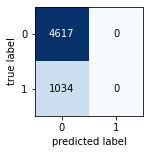

In [9]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

fig, ax = plot_confusion_matrix(conf_mat=conf, figsize=(2, 2))
print('popular number in test set',np.sum(y_test==1))
print('unpopular number in test set',np.sum(y_test==0))
plt.show()

In [23]:
np.sum(glm.predict(X_train)==1)

0

In [10]:
X_test[0,:]

array([ 1.71613e+05,  1.23000e-02,  6.79000e-01,  8.43000e-01,
        9.17000e-01,  7.00000e+00,  3.28000e-01, -7.37800e+00,
        1.00000e+00,  3.96000e-02,  1.25030e+02,  4.00000e+00,
        8.27000e-01])

In [16]:
X_test.shape

(5651, 13)

1034

popular number in train set 2414
unpopular number in train set 10770


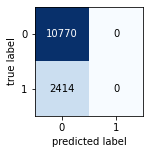

In [35]:
conf=confusion_matrix(y_train, glm.predict(X_train))

fig, ax = plot_confusion_matrix(conf_mat=conf, figsize=(2, 2))
print('popular number in train set',np.sum(y_train==1))
print('unpopular number in train set',np.sum(y_train==0))
plt.show()